This notebook replicates code posted in an NI4AI [blog post](https://blog.ni4ai.org/post/2020-03-30-sunshine-data/) written by Sascha von Meier. The code provides a basic exploration of the "Sunshine" data hosted in the NI4AI platform.

In [2]:
!pip install btrdb


     |████████████████████████████████| 81kB 3.3MB/s 
     |████████████████████████████████| 2.5MB 7.4MB/s 


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#you will need tabulate package installed beforehand by "$ conda install -c conda-forge tabulate"
from tabulate import tabulate

import btrdb
from btrdb.utils.timez import ns_delta, ns_to_datetime, to_nanoseconds

In [6]:
YOUR_API_KEY = 'ENTER YOUR API KEY HERE'

#Establishing the connecting to the server
db = btrdb.connect("api.ni4ai.org:4411", apikey=YOUR_API_KEY)


In [7]:
#Viewing the collection: Data streams are organized into a hierarchichal tree of collections, so let’s view the collections available for the Sunshine dataset using the list_collections method.
db.list_collections("sunshine")


['sunshine/PMU1',
 'sunshine/PMU2',
 'sunshine/PMU3',
 'sunshine/PMU4',
 'sunshine/PMU5',
 'sunshine/PMU6']

In [8]:
#Choosing streams; we are choosing PMU3 here.
streams = db.streams_in_collection('sunshine/PMU3')
streams

[<Stream collection=sunshine/PMU3 name=C3ANG>,
 <Stream collection=sunshine/PMU3 name=C2ANG>,
 <Stream collection=sunshine/PMU3 name=C3MAG>,
 <Stream collection=sunshine/PMU3 name=L1ANG>,
 <Stream collection=sunshine/PMU3 name=C2MAG>,
 <Stream collection=sunshine/PMU3 name=C1ANG>,
 <Stream collection=sunshine/PMU3 name=L2ANG>,
 <Stream collection=sunshine/PMU3 name=L1MAG>,
 <Stream collection=sunshine/PMU3 name=C1MAG>,
 <Stream collection=sunshine/PMU3 name=L3ANG>,
 <Stream collection=sunshine/PMU3 name=L2MAG>,
 <Stream collection=sunshine/PMU3 name=L3MAG>,
 <Stream collection=sunshine/PMU3 name=LSTATE>]

In [9]:
#Retrieving Stream Data
def describe_streams(streams):
    table = [["Index", "Collection", "Name", "Units", "UUID"]]
    for idx, stream in enumerate(streams):
        tags = stream.tags()
        table.append([
            idx, stream.collection, stream.name, tags["unit"], stream.uuid
        ])
    return tabulate(table, headers="firstrow")

print(describe_streams(streams))

  Index  Collection     Name    Units    UUID
-------  -------------  ------  -------  ------------------------------------
      0  sunshine/PMU3  C3ANG   deg      b3ca2159-8fa7-4341-801d-d1228af675b7
      1  sunshine/PMU3  C2ANG   deg      c71f34d1-3cba-4959-b4b9-032ec078c66d
      2  sunshine/PMU3  C3MAG   amps     cd6d2be2-6b7b-4c46-be1e-8432990ef23c
      3  sunshine/PMU3  L1ANG   deg      bc73226c-c877-438a-ab37-7a6703cbfbce
      4  sunshine/PMU3  C2MAG   amps     47da9f9a-f8d9-4955-9e87-9c17dabde298
      5  sunshine/PMU3  C1ANG   deg      bc9d458c-9b54-4ad2-b837-53170a4d7331
      6  sunshine/PMU3  L2ANG   deg      f4b400e1-26f4-4ca9-b301-c2fbb7d77e87
      7  sunshine/PMU3  L1MAG   volts    0295f80f-6776-4384-b563-4582f7256600
      8  sunshine/PMU3  C1MAG   amps     1e641edc-d95a-494f-99f3-cbb991ef05bf
      9  sunshine/PMU3  L3ANG   deg      fabd1511-f6f8-4670-b336-7fbfe412e4a2
     10  sunshine/PMU3  L2MAG   volts    38d62795-6341-4069-96d3-fe74bffcac67
     11  sunshine/

In [10]:
#Choose a time window
start = to_nanoseconds('2015-08-15 3:42:00')
end = to_nanoseconds('2015-08-15 3:47:00')

In [15]:
#Retrieve values from stream 7 (current magnitude for PMU 3)
s = streams[7]
data = s.values(start, end)
data[:2]

[(RawPoint(1439610120008333000, 7301.33935546875), 122084),
 (RawPoint(1439610120016666000, 7301.66796875), 122084)]

Values are returned as a list of tuples reporting RawPoint values and the associated version. Each RawPoint object includes a time stamp (in nanoseconds) and a measurement value.

(RawPoint(time_stamp, value), version)

In [16]:
# Retrieve only the RawPoint objects (without the version)
points, _ = zip(*data)

# Unpack raw points into time stamps and values
times, values = zip(*points)

# Convert time stamps (in nanoseconds) to datetime objects
dtimes = [ns_to_datetime(t) for t in times]

# Convert to a Series, using the time stamp as an index
series = pd.Series(values, index=dtimes)

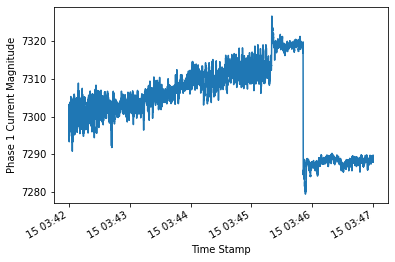

In [20]:
# Graph time series measurements
series.plot()
plt.xlabel('Time Stamp')
plt.ylabel('Phase 1 Current Magnitude')
plt.show()